# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

---
### *The objective is to perform univariate and bivariate analysis, as well as use statistical tests, to answer the given questions about ENews website traffic, ultimately concluding with a recommendation on the prototype landing page.* 
---

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data ✓
2.	Variable Identification ✓
3.  Variable Transformation/Feature Creation ✓
4.  Missing value detection ✓
5.	Univariate Analysis ✓
6.	Bivariate Analysis ✓

# +

### Data Overview
- View a few rows of the dataframe. ✓
- Check the shape and data types of the data frame. Add observations. ✓
- Fix the data-types (if needed). ✓
- Missing Value Check. ✓ (listed twice)
- Summary statistics from the data frame. Add observations. ✓

---
---
---

# Reading the Data into a DataFrame
---
---
---

### I will be using multiple methods to get a feel for the data.

In [2]:
AB = pd.read_csv('abtest.csv')
AB.describe(include='all').T

# i use describe(include='all') to quickly see which variables are qualitative/quantitative, see how many uniques
# are in each categorical variable, & quickly check if any std/means stick out to me.

# for example, the time_spent minimum being 0.19 is very low, far lower than even Q1.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
AB.info()

#100 rows, 6 columns.
#zero null entries.

#there are a few objects, i will convert these to categories.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [4]:
for entry in AB:
    if AB[entry].dtype=='O':
        AB[entry]=AB[entry].astype('category')
AB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


In [5]:
AB.sample(15)

#quick sample. 

#this can be inferred from the definitions of 'group' and 'landing page' given in the instructions, but it seems as if they
#essentially are the same column. treatment = new, control = old.

#to make absolutely sure this is the case, I do a quick groupby below.

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
10,546588,control,old,6.21,yes,Spanish
43,546453,treatment,new,7.16,yes,English
66,546545,control,old,6.60,yes,English
50,546554,control,old,0.22,no,English
44,546488,treatment,new,3.91,no,English
3,546567,control,old,3.02,no,French
36,546551,control,old,3.13,no,English
22,546450,treatment,new,3.65,no,English
84,546571,control,old,4.30,no,French
81,546449,treatment,new,5.26,yes,French


In [6]:
AB.groupby(['group'])['landing_page'].value_counts()

# There are exactly 50 cases of 'old page' in control, and 0 cases of 'new page' in control.

# opposite goes for treatment.

# Therefore, they are interchangeable columns. I will be dropping landing page and editing the names of the group/cats.

group         
control    old    50
           new     0
treatment  new    50
           old     0
Name: landing_page, dtype: int64

In [7]:
AB=AB.rename(columns = {"group":"group_page"})
AB['group_page']=AB['group_page'].cat.rename_categories({'control':'control_old','treatment':'treatment_new'})

AB=AB.drop(['landing_page'],axis=1)

AB

#group is now group_page, and has both the control/treatment group listed, as well as the old/new page.

,user_id,group_page,time_spent_on_the_page,converted,language_preferred
0,546592,control_old,3.48,no,Spanish
1,546468,treatment_new,7.13,yes,English
2,546462,treatment_new,4.40,no,Spanish
3,546567,control_old,3.02,no,French
4,546459,treatment_new,4.75,yes,Spanish
...,...,...,...,...,...
95,546446,treatment_new,5.15,no,Spanish
96,546544,control_old,6.52,yes,English
97,546472,treatment_new,7.07,yes,Spanish
98,546481,treatment_new,6.20,yes,Spanish


---
---
---

# Univariate Analysis
---
---
---


In [8]:
def histobox(data, feature, figsize=(15, 5), kde=False, bins=10):
    
    HBP, (box,hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )
    sns.boxplot(
        data=data, x=feature, ax=box, showmeans=True, color="orange"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=hist, bins=bins, palette="mako" #i like mako
    )
    hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [9]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

---
# User_ID Univariate Analysis

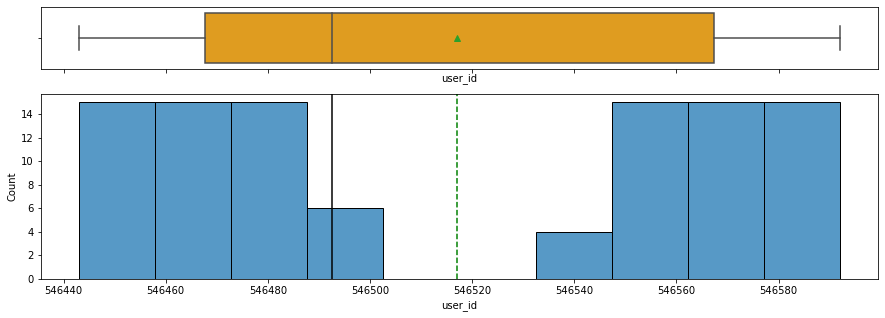

In [10]:
histobox(AB,'user_id')

### Like with project 1, there isn't much we can actually analyze with the user id. However, unlike project 1, I find it interesting there appears to be a gap in the user IDs. 

In [11]:
print(list(AB['user_id'].sort_values()))

[546443, 546444, 546445, 546446, 546447, 546448, 546449, 546450, 546451, 546452, 546453, 546454, 546455, 546456, 546457, 546458, 546459, 546460, 546461, 546462, 546463, 546464, 546465, 546466, 546467, 546468, 546469, 546470, 546471, 546472, 546473, 546474, 546475, 546476, 546477, 546478, 546479, 546480, 546481, 546482, 546483, 546484, 546485, 546486, 546487, 546488, 546489, 546490, 546491, 546492, 546493, 546544, 546545, 546546, 546547, 546548, 546549, 546550, 546551, 546552, 546553, 546554, 546555, 546556, 546557, 546558, 546559, 546560, 546561, 546562, 546563, 546564, 546565, 546566, 546567, 546568, 546569, 546570, 546571, 546572, 546573, 546574, 546575, 546576, 546577, 546578, 546579, 546580, 546581, 546582, 546583, 546584, 546585, 546586, 546587, 546588, 546589, 546590, 546591, 546592]


### Printing the column as a list, I can get a look at where the gap is. It appears between ID 546493 and 546544.
    Why this is, I'm not sure. I don't believe this indicates a failure
    to randomly sample, but it is interesting that about 50 user IDs
    are simply missing from our data.

---
# Group_Page univariate analysis

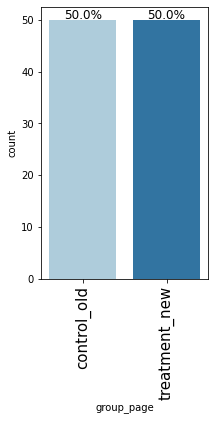

In [12]:
labeled_barplot(AB,'group_page',perc=True)

### This section was partly done in the intro, where I determined that control=old, and treatment=new.
### Exactly half are part of the control/old group and half are part of the treatment/new group. This is according to the definition of an a/b test.
    There really isn't anything more to analyze here.

---
# Time_spent Univariate Analysis

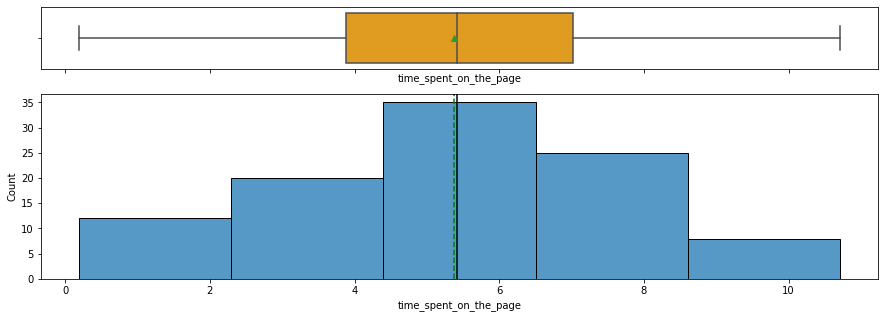

In [13]:
histobox(AB,'time_spent_on_the_page',bins=5)

### As we saw earlier in the .describe(), the mean of time_spent hovers at around 5.3, and it seems to be somewhat normally distributed.

### We will be heavily relying on this numerical for Bivariate analysis, as it is the only numerical with truly substantial values.

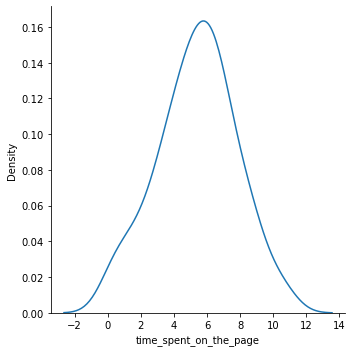

In [14]:
sns.displot(data=AB,x='time_spent_on_the_page',kind='kde');
#A better look at the distribution of time_spent.

---
# Converted Univariate Analysis

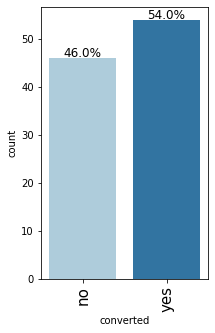

In [15]:
labeled_barplot(AB,'converted',perc=True)

### The most interesting categorical. This will definitely pair well with others in the bivariate analysis.
    It also seems that a slight majority end up converting
    to the new page, regardless of being in control/treatment group.

---
# Language Univariate Analysis

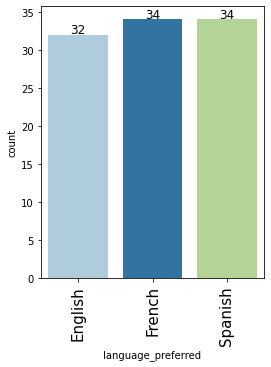

In [16]:
labeled_barplot(AB,'language_preferred')

### The languages are almost equal, but English has 2 fewer users. There isn't much to analyze here, but it will be useful to compare this category to other variables.

---
---
---

# Bivariate Analysis
---
---
---
### I will be ignoring user_id in this section, as it is essentially random. Any patterns seen comparing id to other variables will not help analyze the actual data.

### I will also not be doing a heat map, since there is only one substantial numerical variable.

In [17]:
AB_Biv=AB.drop('user_id',axis=1)
AB_Biv

,group_page,time_spent_on_the_page,converted,language_preferred
0,control_old,3.48,no,Spanish
1,treatment_new,7.13,yes,English
2,treatment_new,4.40,no,Spanish
3,control_old,3.02,no,French
4,treatment_new,4.75,yes,Spanish
...,...,...,...,...
95,treatment_new,5.15,no,Spanish
96,control_old,6.52,yes,English
97,treatment_new,7.07,yes,Spanish
98,treatment_new,6.20,yes,Spanish


---

# Group_page / Converted Bivariate Analysis
### I am starting here because to me, this is the most important analysis to the people testing this new layout.
### Major question: *Is the new layout attractive to people coming to the website?*

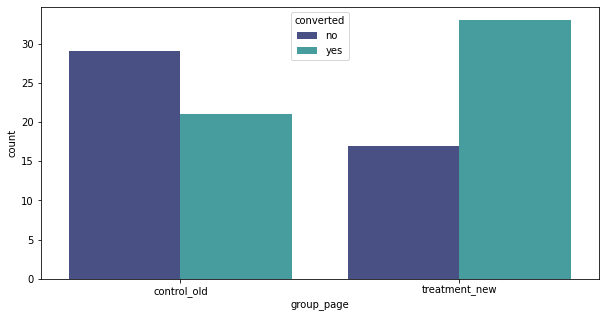

In [18]:
sns.countplot(data=AB_Biv,x='group_page',hue='converted',palette='mako')
plt.gcf().set_size_inches(10,5)

In [19]:
Vals=AB_Biv.groupby('group_page')['converted'].value_counts()
Vals=Vals.reset_index().rename(columns={'level_1':'convert','converted':'count'})
Vals=Vals.pivot(index='group_page',columns='convert')
Vals

count    
convert          no yes
group_page             
control_old      29  21
treatment_new    17  33

### So, our sample indicates that less people converted in control than people in the treatment group.
    This info will be relevant in question 3.

---
# Group_page / Time_spent Bivariate Analysis

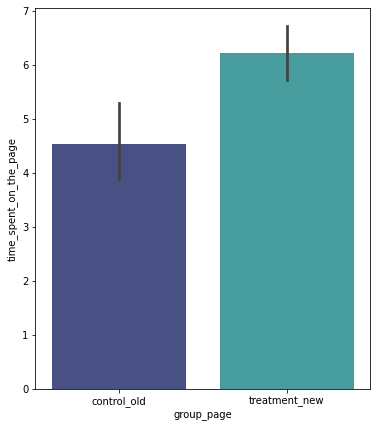

In [20]:
sns.barplot(data=AB_Biv,x='group_page',y='time_spent_on_the_page',palette='mako')
plt.gcf().set_size_inches(6,7)

### The plot indicates that in our sample, more time is spent on the new page.
    Let's check this numerically.

In [21]:
AB_Means=AB_Biv.groupby('group_page')['time_spent_on_the_page'].describe()
AB_Means

,count,mean,std,min,25%,50%,75%,max
group_page,,,,,,,,
control_old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30
treatment_new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71


### The control group on the old page tends to spend less time on the site. However, there is a minimum time of 0.19 minutes in control, which could be heavily skewing the data. Let's check each of the groups individually with histograms.

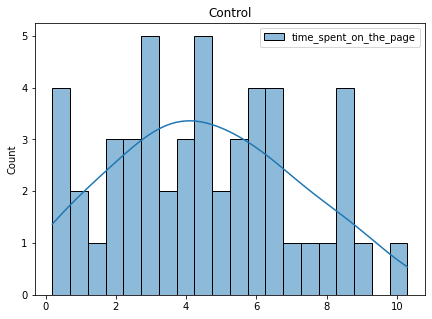

In [22]:
sns.histplot(data=AB_Biv[AB_Biv['group_page']=='control_old']['time_spent_on_the_page'].sort_values(
    ).reset_index().drop('index',axis=1),bins=20,kde='True')
plt.title('Control')
plt.gcf().set_size_inches(7,5)

### As can be seen in the Control histogram, there are a high amount of low-time visits to the old page. The 0.19 minute visit was not an outlier, as multiple users visit the old page for less than a minute. The Control mean is higher than the median by a significant enough amount to give the plot a right skew.

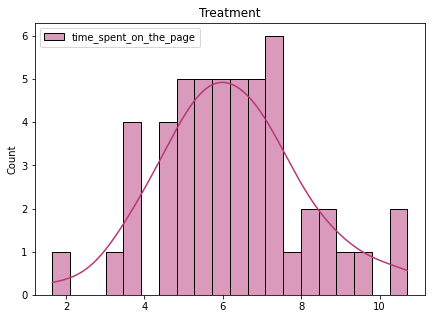

In [23]:
sns.histplot(data=AB_Biv[AB_Biv['group_page']=='treatment_new']['time_spent_on_the_page'].sort_values(
    ).reset_index().drop('index',axis=1),bins=20,palette='magma',kde='True')
plt.title('Treatment')
plt.gcf().set_size_inches(7,5)

### As can be seen in the Treatment histogram, there are very few low-time visits to the new page. There is still a mathematical right-skew in the treatment data, but unlike control, it is far less visually apparent. This indicates that within the sample, more people tend to stick around on the new page.

### *Major question answer:* Within our sample, people tend to stay on the website longer in the treatment / new page group. This seems to indicate that people like it, at least in our sample size of 100.
    This will be relevant in question 2.

---
# Quick check Group_page / Language Preferred
    This won't be full-fledged analysis, but instead a quick check to see if
    there were any languages that weren't given enough trials in one group or the other.

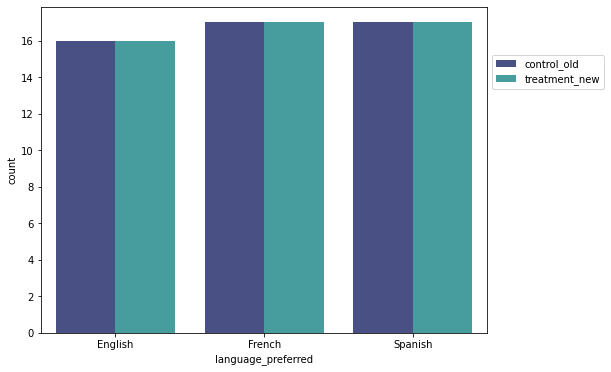

In [24]:
sns.countplot(data=AB_Biv,x='language_preferred',hue='group_page',palette='mako')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.gcf().set_size_inches(8,6)

### As can be seen above, the a/b splits between the control/treatment groups were equal for each language preference.

---
# Converted / Time_spent Bivariate Analysis
    This isn't a question asked below, but I am curious how time_spent effects new page conversion.
#### *Minor question: In our sample, is there a link between time spent on the website and conversion to the new layout?*

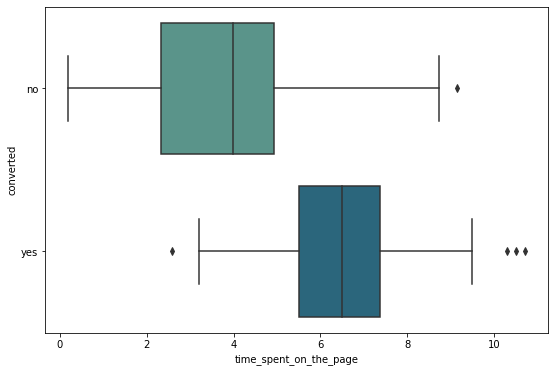

In [25]:
sns.boxplot(data=AB_Biv,y='converted',x='time_spent_on_the_page',palette='crest')
plt.gcf().set_size_inches(9,6)

### It seems in our sample, the more time spent on the page, the higher the conversion rate.
### I want to add in another variable, group_page, to make sure the control/treatment groups aren't skewing the data in any weird ways.

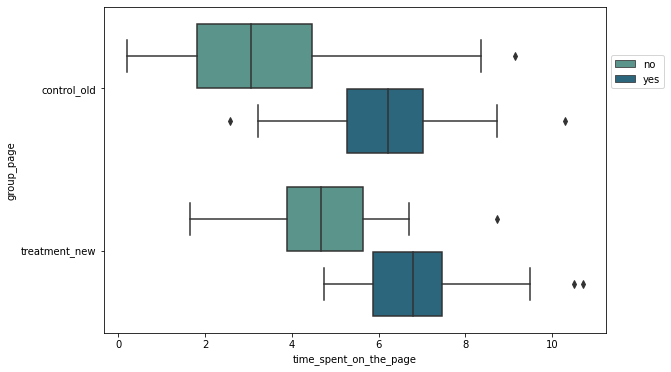

In [26]:
sns.boxplot(data=AB_Biv,hue='converted',x='time_spent_on_the_page',y='group_page',palette='crest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.gcf().set_size_inches(9,6)

### So, regardless of group, in our sample, the more time someone spent on the page, the more likely they were to convert to the new page.
    This can be seen as a follow-up to the Group_page / Time_spent bivariate analysis.

---
# Conversion / Language Bivariate Analysis
### I am using subplots to plot both x='converted' and x='language_preferred', as both countplots are useful.
    The left plot makes it easy to compare language preferences with both converted and unconverted users.
    
    The right plot makes it easy to visualize the proportions of each languages' conversion rate.

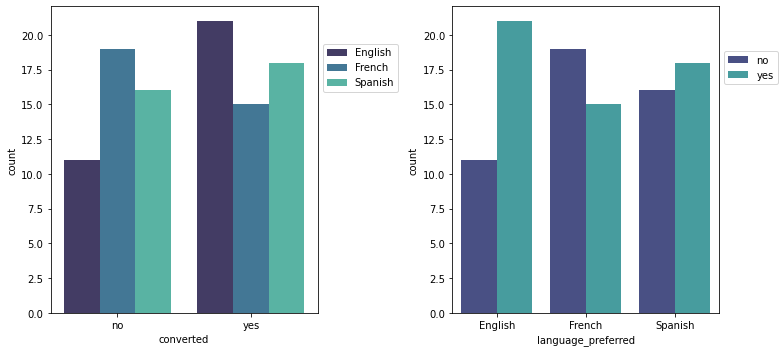

In [27]:
p,(count1,count2)=plt.subplots(
    ncols=2,
    figsize=(11,5)
)

sns.countplot(data=AB_Biv,x='converted',hue='language_preferred',ax=count1,palette='mako')
sns.countplot(data=AB_Biv,hue='converted',x='language_preferred',ax=count2,palette='mako')

count1.legend(loc='center left', bbox_to_anchor=(1, 0.8))
count2.legend(loc='center left', bbox_to_anchor=(1, 0.8))
p.tight_layout()

### Within our sample:
1) English has the highest conversion rate by a mile. It also has the highest number of conversions overall.    
2) French has the lowest conversion rate, as well as the only conversion rate that weighs more  
   heavily towards no.  
   
### Let's put this data into its own pivoted dataframe (for use in the independence test we will do in question 4).

In [28]:
AB_Con_Lan=AB_Biv.groupby(['converted'])['language_preferred'].value_counts().reset_index(
                    ).rename(columns = {"level_1":"language",'language_preferred':'count'})
AB_Con_Lan=AB_Con_Lan.pivot(index='language',columns='converted')
AB_Con_Lan

count    
converted    no yes
language           
English      11  21
French       19  15
Spanish      16  18

---
# Language / Time_spent Bivariate Analysis
### *Major Question:* Does preferred language have an effect on time spent on the site? This could indicate there is a translation problem if one is significantly lower.

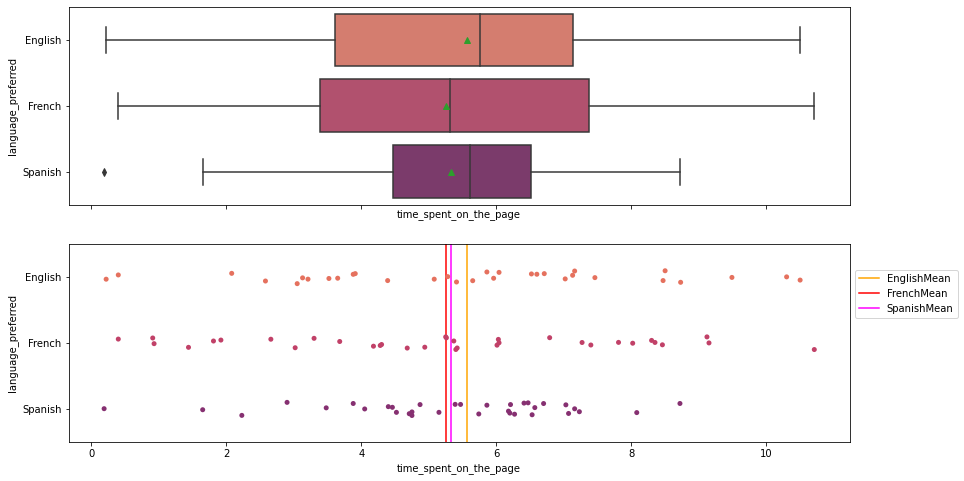

In [29]:
p,(box,strip)=plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(14,8)
    )

sns.boxplot(data=AB_Biv,y='language_preferred',x='time_spent_on_the_page',showmeans=True,ax=box,palette='flare')


sns.stripplot(data=AB_Biv,y='language_preferred',x='time_spent_on_the_page',ax=strip,palette='flare')



strip.axvline(
    AB_Biv[AB_Biv['language_preferred']=='English']['time_spent_on_the_page'].mean(), color="orange", linestyle="-",
    label='EnglishMean'
)
strip.axvline(
    AB_Biv[AB_Biv['language_preferred']=='French']['time_spent_on_the_page'].mean(), color="red", linestyle="-",
    label='FrenchMean'
)
strip.axvline(
    AB_Biv[AB_Biv['language_preferred']=='Spanish']['time_spent_on_the_page'].mean(), color="magenta", linestyle="-",
    label='SpanishMean'
)

strip.legend(loc='center left', bbox_to_anchor=(1, 0.75));


### Nothing really stands out here, the means and medians are all fairly close, with French standard deviation being higher than the others.
### Let's include group_page as a hue.

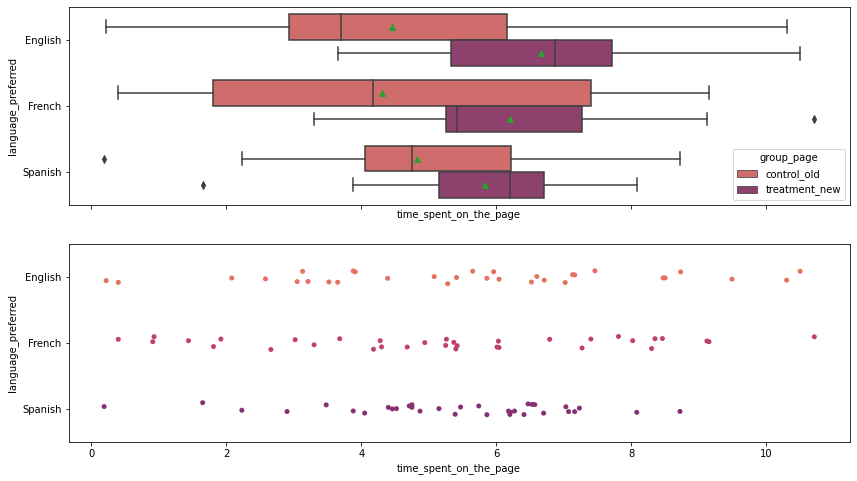

In [30]:
p,(box,strip)=plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(14,8)
    )

sns.boxplot(data=AB_Biv,y='language_preferred',x='time_spent_on_the_page',
            hue='group_page',showmeans=True,ax=box,palette='flare')


sns.stripplot(data=AB_Biv,y='language_preferred',x='time_spent_on_the_page',ax=strip,palette='flare');


### Universally, the new page seems to attract longer attention regardless of language.

### However, there does seem to be a pattern in the treatment/new group (English mean and median is much higher than the others). This could indicate possible translation issues in the new page, which most are willing to put up with due to the layout being generally superior.

### Let's get a groupby for the treatment group for question 5.

In [31]:
AB_ANOVA=AB_Biv[AB_Biv['group_page']=='treatment_new'].groupby(['language_preferred'])['time_spent_on_the_page'].describe()
AB_ANOVA

,count,mean,std,min,25%,50%,75%,max
language_preferred,,,,,,,,
English,16.0,6.663750,1.984150,3.65,5.3275,6.865,7.7125,10.50
French,17.0,6.196471,1.933394,3.30,5.2500,5.420,7.2700,10.71
Spanish,17.0,5.835294,1.525656,1.65,5.1500,6.200,6.7000,8.08


# End of analysis
---
---
---

# 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)
    AKA - PopMean_New > PopMean_Old

## Perform Visual Analysis
### Both the Control time_spent and Treatment time_spent appear normally distributed. This will be shown with shapiro-wilk in data gathering as well.

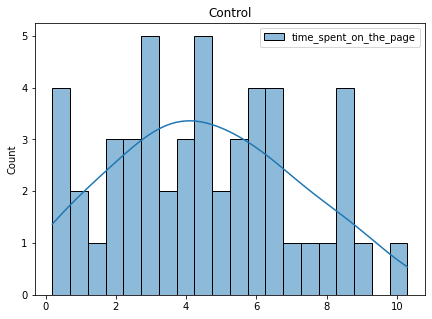

In [32]:
sns.histplot(data=AB_Biv[AB_Biv['group_page']=='control_old']['time_spent_on_the_page'].sort_values(
    ).reset_index().drop('index',axis=1),bins=20,kde='True')
plt.title('Control')
plt.gcf().set_size_inches(7,5)

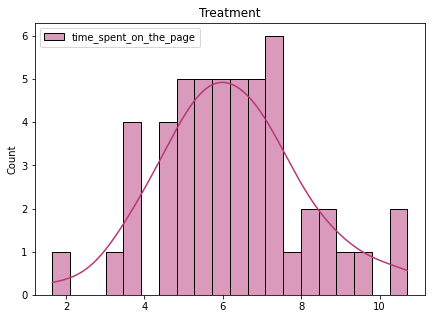

In [33]:
sns.histplot(data=AB_Biv[AB_Biv['group_page']=='treatment_new']['time_spent_on_the_page'].sort_values(
    ).reset_index().drop('index',axis=1),bins=20,palette='magma',kde='True')
plt.title('Treatment')
plt.gcf().set_size_inches(7,5)

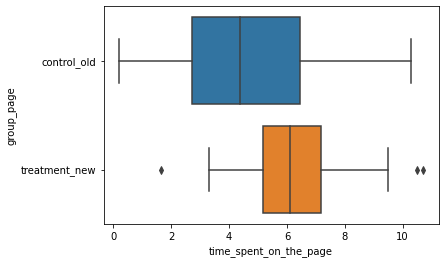

In [34]:
sns.boxplot(data=AB_Biv,y='group_page',x='time_spent_on_the_page');
#It would seem by the sample that the standard deviations are very far apart. However,
#we cannot make that call off of visuals alone.

### This is a problem dealing with equality/inequality of independent means, so we will be using a 2 sample independent mean test. We do not know what any of the standard deviations are, nor do we know if they are inequal or equal.
---

## Step 1: Define the null and alternate hypotheses
    The null hypothesis is that the mean time spent on
    E-News is equal for the old and new layout.
    
    The alternative hypothesis is that the mean time spent on the
    new E-News layout is greater than that of the old layout.

1) Continuous Data  
*The numerical data is time, which is continuous.*

2) Normally Distributed  
*Both of the histograms (group_page,time_spent) produced in Visual Analysis appear normal, but will be tested with shapiro-wilk.*

3) Independent Populations  
*The a/b test requires this, otherwise the control would not be a control.*

4) Inequal OR Equal Population SDs  
*More on this later.*

5) Random Sampling   
*This is assumed of the dataset.*


# _Null_
# H<sub>0</sub> : μ<sub>new</sub> = μ<sub>old</sub>  
# _Alt_
# H<sub>a</sub> : μ<sub>new</sub> > μ<sub>old</sub>

## Step 2: Select Appropriate test

shapiro,  
f-test for equality of variances  
ttest_ind

## Step 3: Decide the significance level

Standard significance is 0.05

## Step 4: Collect and prepare data
    I will start with both shapiro tests.
    
    Remember, these are to test specifically the histograms of time_spent_on_the_page
    when filtered by the control group, and when filtered by the treatment group.

# _Null_
# H<sub>0</sub> : Time_spent (in only control_old) is Normally Distributed
# _Alt_
# H<sub>a</sub> : Time_spent (in only control_old) is NOT Normally Distributed

In [35]:
from scipy.stats import shapiro

w,p_value=shapiro(AB_Biv[AB_Biv['group_page']=='control_old']['time_spent_on_the_page'].sort_values(
    ).reset_index().drop('index',axis=1))
p_value

0.45611920952796936

### Therefore, we fail to reject the null, and Time_spent (in the control group) is normally distributed.

# _Null_
# H<sub>0</sub> : Time_spent (in only treatment_new) is Normally Distributed
# _Alt_
# H<sub>a</sub> : Time_spent (in only treatment_new) is NOT Normally Distributed

In [36]:
w,p_value=shapiro(AB_Biv[AB_Biv['group_page']=='treatment_new']['time_spent_on_the_page'].sort_values(
    ).reset_index().drop('index',axis=1))
p_value

0.8040016293525696

### Therefore, we fail to reject the null, and Time_spent (in the treatment group) is normally distributed.

### Next, we will create the two series in which control data for time_spent and treatment data for time_spent are stored.

In [56]:
AB_Means #for standard deviation reference

,count,mean,std,min,25%,50%,75%,max
group_page,,,,,,,,
control_old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30
treatment_new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71


In [37]:
AB_old=AB[AB['group_page']=='control_old']['time_spent_on_the_page']
AB_new=AB[AB['group_page']=='treatment_new']['time_spent_on_the_page']


### Finally, we need to check for equality/inequality of the variances.
    
## f-test for equality of variances/standard deviations.
1) Normally Distributed Population  
    *Both of the histograms (group_page,time_spent) produced in Visual Analysis are indeed approximately normal.*  
    
2) Independent Populations  
    *The a/b test requires this, otherwise the control would not be a control.*  
    
3) Larger Variance is placed in the NUMERATOR.  
    *Look above. control_old has the larger standard deviation, so we shall place that in the  
    numerator of the f-test.*  
 

# _Null_
# H<sub>0</sub> : σ<sub>1</sub><sup>2</sup> = σ<sub>2</sub><sup>2</sup> 
# _Alt_
# H<sub>a</sub> : σ<sub>1</sub><sup>2</sup> != σ<sub>2</sub><sup>2</sup> 

In [38]:
from scipy.stats import f
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    test_stat = np.var(x, ddof=1)/np.var(y, ddof=1)
    
    dfn = x.size-1
    dfd = y.size-1

    p = (1 - f.cdf(test_stat, dfn, dfd))

    return(print("The p_value is {:.7f}" .format(p)))

f_test(AB_old,AB_new)

The p_value is 0.0077056


### Since this is smaller than our standard of 0.05 𝛼, we can reject the null, and these variances are not equal.

## Step 5: Calculate the p-value

### Now, we use ttest_ind with equal_var = False to find the means' p-value.

In [39]:
from scipy.stats import ttest_ind as ttin

test_stat_false,p_value_false=ttin(AB_new,AB_old,equal_var=False,alternative='greater')
p_value_false

0.0001392381225166549

## Step 6: Compare the p-value with $\alpha$

p_value_false is far lower than our level of significance of 0.05. Therefore...

## Step 7:  Draw inference

# The null hypothesis is rejected. The new-layout does indeed retain more attention throughout the population.

---
---
---

# 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)
    AKA Conversion%_New > Conversion%_Old

## Perform Visual Analysis


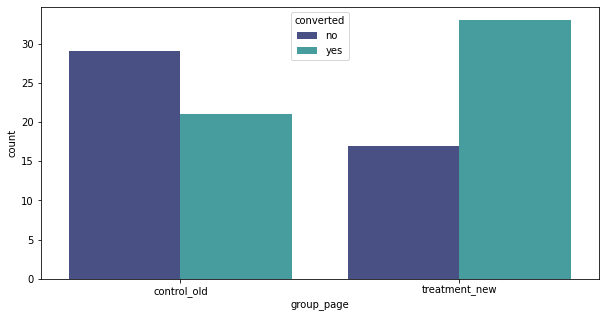

In [40]:
sns.countplot(data=AB_Biv,x='group_page',hue='converted',palette='mako')
plt.gcf().set_size_inches(10,5)

### It seems cut and dry here. We will perform a 2-sample proportion z-test to confirm our suspicions.

## Step 1: Define the null and alternate hypotheses

    The null hypothesis is that the control and treatment have equal
    proportions of converted users.
    
    The alternative hypothesis is that the treatment has a higher
    proportion of converted users than that of the control.
    
### Assumptions:
1) Binomially Distributed Population   
*We will be making the plot information into a proportion.*

2) Independent Populations   
*Has to be or else it's not a control.*

3) Random Sampling   
*Assumed as part of the experiment.*

4) When both n×p and n×(1-p) are >= 10 for both populations, the binomial distributions can be approximated to normal distributions.  
*More on this later.*


# _Null_
# H<sub>0</sub> : p<sub>new</sub> = p<sub>old</sub>
# _Alt_
# H<sub>a</sub> : p<sub>new</sub> > p<sub>old</sub>

## Step 2: Select Appropriate test

proportions_ztest (for 2 independent populations)

## Step 3: Decide the significance level

Standard 0.05.

## Step 4: Collect and prepare data

In [41]:
Vals

count    
convert          no yes
group_page             
control_old      29  21
treatment_new    17  33

### For both control and treatment, n=50.
### np and n(1-p) for both control and treatment are shown above:
    control np = 21
    control n(1-p) = 29
    treatment np = 33
    treatment n(1-p) = 17
### Since all 4 are above 10, the 4th assumption is satisfied, and we can use the 2-sample proportion z-test.

## Step 5: Calculate the p-value

In [42]:
from statsmodels.stats.proportion import proportions_ztest as pzt

Yes=np.array([33,21])
N=np.array([50,50])

test_stat,p=pzt(Yes,N,alternative='larger')

## Step 6: Compare the p-value with $\alpha$

In [43]:
p < 0.05

True

## Step 7:  Draw inference

# Since the p-value is lower than 0.05, we reject the null hypothesis. The treatment group does indeed have a higher conversion rate to the new layout throughout the population.
---
---
---


# 4. Are conversion and preferred language independent or related? (10 Marks)
    AKA Are Conversion & Preferred Language Independent or Dependent?

## Perform Visual Analysis

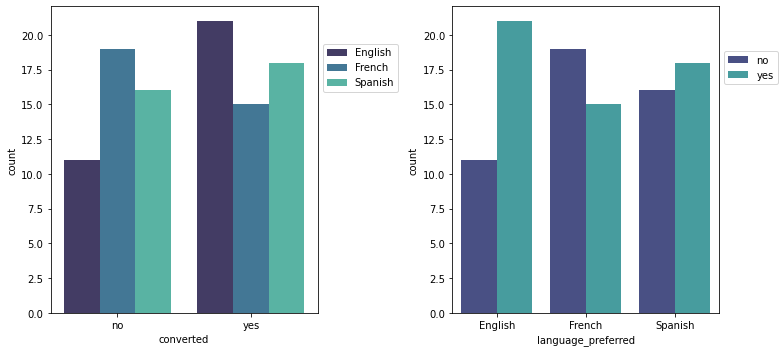

In [44]:
p,(count1,count2)=plt.subplots(
    ncols=2,
    figsize=(11,5)
)

sns.countplot(data=AB_Biv,x='converted',hue='language_preferred',ax=count1,palette='mako')
sns.countplot(data=AB_Biv,hue='converted',x='language_preferred',ax=count2,palette='mako')

count1.legend(loc='center left', bbox_to_anchor=(1, 0.8))
count2.legend(loc='center left', bbox_to_anchor=(1, 0.8))
p.tight_layout()

### English seems to be the strongest evidence that language and conversion are dependent.

## Step 1: Define the null and alternate hypotheses
    The null hypothesis is that the rate of conversion and language preference are independent.
    
    The alternative hypothesis is that the rate of conversion and language preference are dependent.

### Assumptions:
1) Categorical Variables  
*Both converted and language are categorical.*

2) Number of sample observations in each level of the variable is >=5  (all counts in rows/cols is >=5)  
*We will get to that.*

3) Random Sampling  
*Assumed.*
 

# _Null_
# H<sub>0</sub> : The row and column variables are independent.
# _Alt_
# H<sub>a</sub> : The row and column variables are dependent.

## Step 2: Select Appropriate test

chi2_contingency

## Step 3: Decide the significance level

0.05 as always.

## Step 4: Collect and prepare data

In [45]:
AB_Con_Lan

count    
converted    no yes
language           
English      11  21
French       19  15
Spanish      16  18

### Since every count is >= 5, we can use chi2_contingency. The dataframe is a little messy in format so I will clean it up before putting it through the equation.

In [46]:
AB_Con_Lan_Clean=pd.DataFrame(pd.concat([AB_Con_Lan['count']['no'],AB_Con_Lan['count']['yes']],axis=1,sort=False)).reset_index().drop('language',axis=1)
AB_Con_Lan_Clean

,no,yes
0,11,21
1,19,15
2,16,18


## Step 5: Calculate the p-value

In [47]:
from scipy.stats import chi2_contingency as chi2con

chi,p_value,dof,expected=chi2con(AB_Con_Lan_Clean)
p_value

0.2129888748754345

## Step 6: Compare the p-value with $\alpha$

In [48]:
p_value<0.05

False

## Step 7:  Draw inference

# The p-value is well above the level of significance. We fail to reject the null hypothesis. Therefore, languages and conversions are independent. 
# In other words, the conversion rate of the population to the new layout is independent of the preferred language of the user.
---
---
---


# 5. Is the time spent on the new page the same for different language users? (10 Marks)
    AKA ANOVA All the mean_times of the languages for NEW LAYOUT ONLY!

In [49]:
AB_ANOVA

,count,mean,std,min,25%,50%,75%,max
language_preferred,,,,,,,,
English,16.0,6.663750,1.984150,3.65,5.3275,6.865,7.7125,10.50
French,17.0,6.196471,1.933394,3.30,5.2500,5.420,7.2700,10.71
Spanish,17.0,5.835294,1.525656,1.65,5.1500,6.200,6.7000,8.08


## Perform Visual Analysis

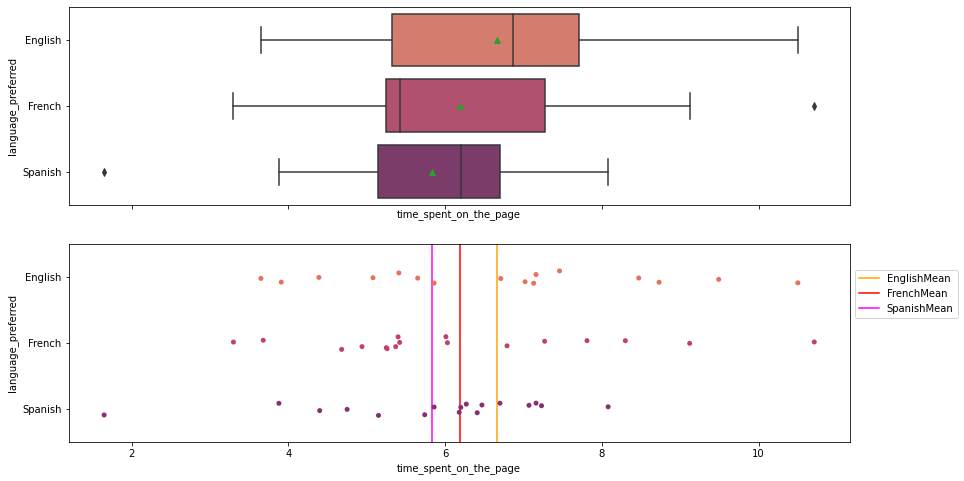

In [50]:
AB_treat=AB[AB['group_page']=='treatment_new']

p2,(box,strip)=plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(14,8)
    )

sns.boxplot(data=AB_treat,x='time_spent_on_the_page',y='language_preferred',ax=box,showmeans=True,palette='flare')


sns.stripplot(data=AB_treat,y='language_preferred',x='time_spent_on_the_page',ax=strip,palette='flare');

strip.axvline(
    AB_treat[AB_treat['language_preferred']=='English']['time_spent_on_the_page'].mean(), color="orange", linestyle="-",
    label='EnglishMean'
)
strip.axvline(
    AB_treat[AB_treat['language_preferred']=='French']['time_spent_on_the_page'].mean(), color="red", linestyle="-",
    label='FrenchMean'
)
strip.axvline(
    AB_treat[AB_treat['language_preferred']=='Spanish']['time_spent_on_the_page'].mean(), color="magenta", linestyle="-",
    label='SpanishMean'
)

strip.legend(loc='center left', bbox_to_anchor=(1, 0.75));

### The mean of the preferred language of English is quite a bit further out from the others, as is its median. This may indicate that it is outside the between-group variance.

## Step 1: Define the null and alternate hypotheses
    The null hypothesis is all 3 language population mean-times are equal.
    
    The alternative hypothesis is at least 1 (population) mean-time is not equal.
    
### Assumptions: 
1) The populations are Normally Distributed  
*Will test with Shapiro-Wilk.*

2) Samples are independent simple random samples  
*Yep.*

3) Population variances are EQUAL  
*Will test with Levene.*

# _Null_
# H<sub>0</sub> : μ<sub>1</sub> = μ<sub>2</sub> = μ<sub>3</sub>
# _Alt_
# H<sub>a</sub> : At least ONE population mean μ<sub>j</sub> is inequal

## Step 2: Select Appropriate test
    shapiro,
    levene,
    f_oneway

## Step 3: Decide the significance level

0.05, i think!

## Step 4: Collect and prepare data
### First, the shapiro test for normality.
# _Null_
# H<sub>0</sub> : Time_spent is Normally Distributed
# _Alt_
# H<sub>a</sub> : Time_spent is NOT Normally Distributed

In [51]:
from scipy.stats import shapiro

w,p_value=shapiro(AB_treat['time_spent_on_the_page'])
p_value

0.8040016293525696

### Therefore, we fail to reject the null, and Time_spent is normally distributed.
### Next, Levene for equality of variances.

# _Null_
# H<sub>0</sub> : All population variances are equal
# _Alt_
# H<sub>a</sub> : At least ONE population variance σ<sub>j</sub><sup>2</sup> is inequal

In [52]:
from scipy.stats import levene

levene(AB_treat['time_spent_on_the_page'][AB_treat['language_preferred']=='English'],
      AB_treat['time_spent_on_the_page'][AB_treat['language_preferred']=='Spanish'],
      AB_treat['time_spent_on_the_page'][AB_treat['language_preferred']=='French'],
      )

LeveneResult(statistic=0.7736446756800186, pvalue=0.46711357711340173)

### Therefore, we fail to reject the null, and all 3 preferred languages' time_spent variances are equal.

## Step 5: Calculate the p-value
    Finally, we use f_oneway to test the original null hypothesis.

In [53]:
from scipy.stats import f_oneway

test_stat,p=f_oneway(AB_treat.loc[AB_treat['language_preferred']=='English']['time_spent_on_the_page'],
        AB_treat.loc[AB_treat['language_preferred']=='Spanish']['time_spent_on_the_page'],
        AB_treat.loc[AB_treat['language_preferred']=='French']['time_spent_on_the_page'],
        )
p

0.43204138694325955

## Step 6: Compare the p-value with $\alpha$

In [54]:
p<0.05

False

## Step 7:  Draw inference

# Since we failed to reject the null, the mean time_spent_on_the_page is equal for every supported language, for the population.

---
---
---

# Conclusion and Business Recommendations

### The new layout seems to be widely liked. There aren't any major translation issues with the 3 supported languages, and those in the test group seemed to switch over with a greater rate than those in the control group. I would highly recommend officially implementing the new landing page, as it retains attention for much longer than the old one.